# Customizing Matplotlib: Configurations and Stylesheets

In [2]:
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np
%matplotlib inline

## Plot Customization by Hand

We saw that. Here is an example

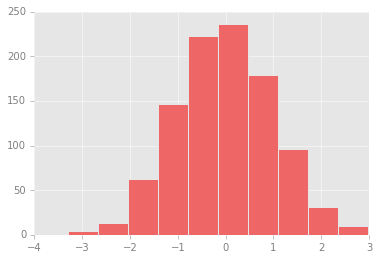

In [4]:
x = np.random.randn(1000)

# use a gray background
ax = plt.axes(facecolor='#E6E6E6')
ax.set_axisbelow(True)

# draw solid white grid lines
plt.grid(color='w', linestyle='solid')

# hide axis spines
for spine in ax.spines.values():
    spine.set_visible(False)
    
# hide top and right ticks
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# lighten ticks and labels
ax.tick_params(colors='gray', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')
    
# control face and edge color of histogram
ax.hist(x, edgecolor='#E6E6E6', color='#EE6666');

## Changing the Defaults: `rcParams`

Each time Matplotlib loads, it defines a runtime configuration (rc) containint default styles for every plot element we create. This can be modified.

Let's start by saving a copy of the current `rcParams` dict to be able to easily reset

In [5]:
IPython_default = plt.rcParams.copy()

Now we can use `plt.rc` function to tweak settings

In [6]:
from matplotlib import cycler
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

Let's see the results

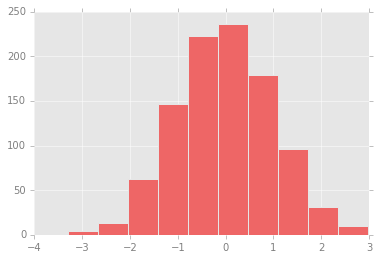

In [8]:
plt.hist(x);

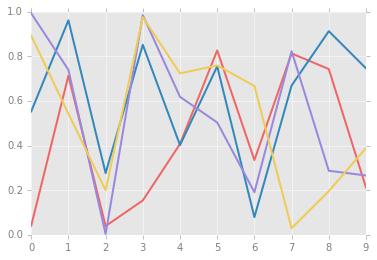

In [9]:
for i in range(4):
    plt.plot(np.random.rand(10))

## Stylesheets

Since 1.4, there is a `style` module, which includes a number of new default stylesheets, as well as the ability to create and package your own styles. The available styles are listed in `ply.style.available`

In [11]:
plt.style.available[:5]

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh']

The basic way to switch to a stylesheet is `plt.style.use('stylename')`

A good way to change the style for a specifi part of the code (and not the entire session) is to use `with` statement

In [15]:
with plt.style.context('bmh'):
    # do things
    pass

Let's define a function to make two basic plots, just for next examples

In [16]:
def hist_and_lines():
    np.random.seed(0)
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10))
    ax[1].legend(['a', 'b', 'c'], loc='lower left')

### Default style

First, we need to reset our runtime configuration

In [17]:
# reset rcParams
plt.rcParams.update(IPython_default);

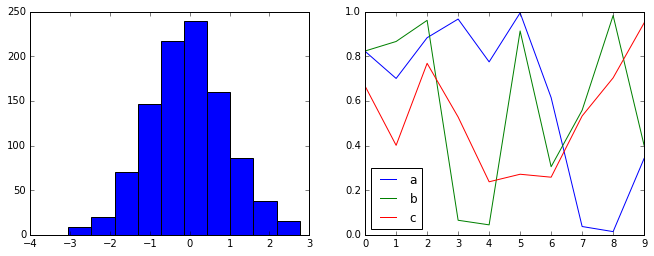

In [18]:
hist_and_lines()

### FiveThiryEight style

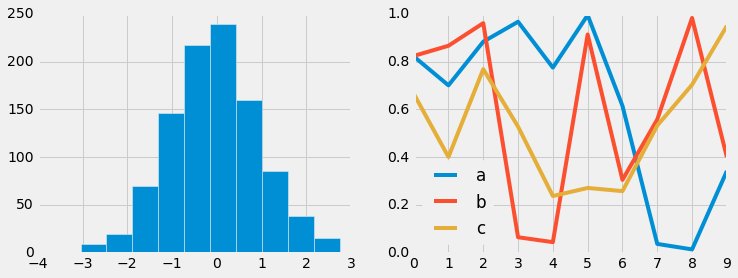

In [19]:
with plt.style.context('fivethirtyeight'):
    hist_and_lines()

### ggplot

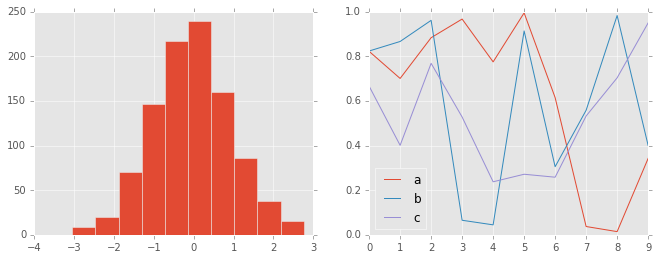

In [20]:
with plt.style.context('ggplot'):
    hist_and_lines()

### Bayesian Methods for Hackers

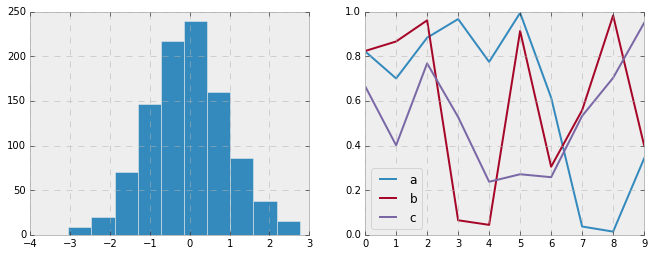

In [21]:
with plt.style.context('bmh'):
    hist_and_lines()

### Dark Background

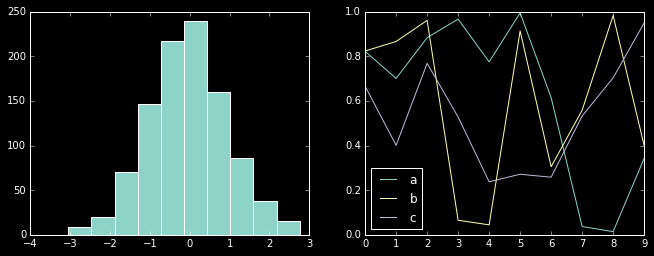

In [22]:
with plt.style.context('dark_background'):
    hist_and_lines()

### Grayscale

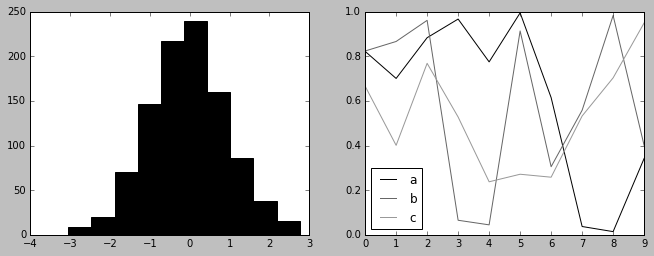

In [23]:
with plt.style.context('grayscale'):
    hist_and_lines()

### Seaborn style

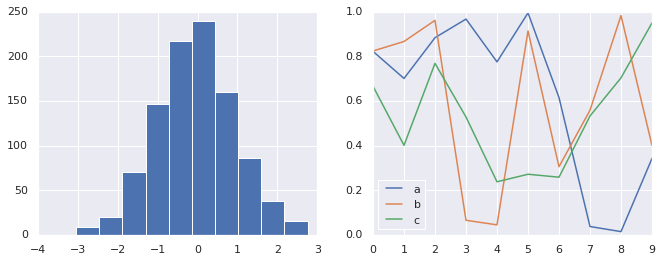

In [25]:
import seaborn as sns
sns.set_theme()
hist_and_lines()